In [1]:
import requests
import time
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import word_tokenize
from nltk.corpus import state_union
from nltk.tag import pos_tag
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt
import collections, re
import string
import pylab as plt
import seaborn as sns 
import wordcloud
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth', 999)

%matplotlib inline

In [2]:
def get_subreddit_data(subreddit,epoch_time):
    url =f'https://api.pushshift.io/reddit/search/submission?subreddit={subreddit}&author!=[deleted]&size=500&is_self=true&before={epoch_time}'
    res = requests.get(url)
    data = res.json()
    return data['data']

In [3]:
def exist_keys(post_to_check):
    if ("author" in post_to_check and "selftext" in post_to_check and "is_self" in post_to_check):
        return True
    else:
        return False

In [4]:
def check_post(post_to_check):
    if exist_keys(post_to_check):
        author = post_to_check['author']
        selftext = post_to_check['selftext']
        is_self = post_to_check['is_self']
        if (author != '[deleted]' and author != 'deleted' and author != 'removed' 
                and selftext != 'removed' and selftext != ""
                and selftext != 'deleted' and 500 < len(selftext) < 5000
                and "http://" not in selftext and "https://" not in selftext
                and is_self) :
            return True
        else:
            return False
    else:
        return False

In [5]:
def get_filtered_posts(subreddit,post_count):
    result = []
    epoch_time = int(time.time())
    is_end_of_topic = False
    while len(result) <= post_count and not is_end_of_topic:
        post_list = get_subreddit_data(subreddit,epoch_time)
        temp_result = [post for post in post_list if check_post(post)]
        result.extend(temp_result)
        if epoch_time != int(result[-1]['created_utc']):
            epoch_time = int(result[-1]['created_utc'])
        else:
            is_end_of_topic = True
    return result

In [6]:
star_wars_posts = get_filtered_posts("StarWars",500)

In [7]:
star_trek_posts = get_filtered_posts("startrek",500)

In [8]:
#print(len(star_wars_posts))
#for post in star_wars_posts:
   # print(post['selftext'])
    #print("-------------------------------------------")

In [9]:
df = pd.DataFrame(star_wars_posts)

In [10]:
df_1=pd.DataFrame(star_trek_posts)

In [11]:
new=df[['subreddit','selftext','title']]
new

,subreddit,selftext,title
0,StarWars,"Full disclosure - I'm not fully aware of all the OT lore in the comics/canon books. After seeing the Clone Wars finale and knowing that Ahsoka was alive past ROTJ - is it possible that she met with and helped train Luke between ESB and ROTJ?\n\nLuke levels up quite a bit between those movies and I don't think he is trained by Yoda during that time (unless there is some other non-film canon explanation for how he gets so much better with the force.)\n\nIt would be sweet to see them interact somehow, or with some of the other OT/ST characters. Can't wait to see what they do with her in live action.",Theory: Does Ahsoka help train Luke?
1,StarWars,"With baby yoda seeming to have a significant purpose, where will his place be in the next hundreds of years? With The sky walker saga being done it sounds like the main story line will not continue into the future. \n\nWhat will baby yoda purpose be? Will his life get cut short?\n\nWill Ezra and baby yoda end up being the future of the Jedi or Sith?\n\nOr will Mando and baby yoda lead the rise of mandalorians and build a new found friendship\n\nWe can guess Ashoka is dead based on the voice in rise of sky Walker so where will the future be",What wil baby yoda end up being
2,StarWars,"The show starts showing two figures laughing and talking around a table, we can't hear them talking, just see their movements. The image focuses and it shows that these figures are obi wan and Anakin(Hayden Christensen) and they're on naboo. They both turn their head and a young boy runs up to Anakin and the camera pans over to padme walking in with a young girl. Obi wan looks up at her and smiles but then we hear a loud wind and the room goes dark. We're suddenly on tatooine with a worn down obi wan who just had his fire blown out and was hit in the face with some sand. He wipes his face off and says ""I hate sand"" as the camera cuts away and the opening credits/theme plays.",Had a dream last night after watching ROTS as to how the new Kenobi show should open
3,StarWars,"Post contains spoilers for Star Wars Rebels and Clone Wars!\n\n\nI've been seeing a lot of hate towards rebels recently, specifically the art, however, there are others commenting on the ""trash plot"", ""dull characters"" and a range of other criticism which I personally feel the show doesn't deserve.\n\nRebels is still Star Wars and it's a great piece of canon that really helps show what the empires reign was like in the early years. It is packed with exciting moments that are arguably more memorable than a lot of the memorable moments in the clone wars (with exception of season 7), such as Ahsoka vs Vader or Ezra and Thrawn disappearing into the outer rim somewhere and especially the development and final moments of Maul. \n\nRebels art style isn't even that bad, it's just not as good as the clone wars. The only major flaws in the artwork was Yoda, Hondo, Anakin and Bo, Everything else was fine if not good. Rebels was our first ""Canon"" introduction to how brutal Vader was in the ti...",Rebels is still a good show despite its faults.
4,StarWars,"I once had a friend claim that Maul is just as evil, if not, MORE evil than old Sheev. I pondered that notion, but had to disagree. Here's why:\n\nMaul knew nothing besides violence and bloodshed from the day he was born. He grew up on the ruthless planet of Dathomir, and was recruited by Sidious at a young age. The ways of the Sith melded naturally with the warrior ways of male Dathomirian tribes. He never really had a chance to be anything but a killing machine. He grew to tfavor the Dark Side because it granted him the ability to reach the top of any hierarchy he desired, crowning him as the alpha among all of his peers.\n\nContrarily, Sidious was raised in a Royal family on the peaceful planet of Naboo. He was naturally drawn to positions of power, and sought out knowledge of the mythical Sith. He initially wasn't influenced by any outside force. He j

In [12]:
new_1=df_1[['subreddit','selftext','title']]
new_1

,subreddit,selftext,title
0,startrek,"What I mean by that:\n\nOften times the main characters encounter some kind of danger or pursue some kind of hint which sends them traveling through the galaxy, spanning great distances, jumping in and out of warp, etc.\n\nThe main characters of course know what's up: Captain Picard gives the order to ""set course for X, maximum warp!"" and off they go.\n\nOr they get attacked and suddenly have to travel halfway across the galaxy. Or they orbit around a seemingly random planet because an away team hasn't returned.\n\nThe main characters as well as we, the viewers, obviously know what's up, why they're jumping from planet A to planet B in short succession or what just hit the enterprise to cause damage on decks 17 through 19.\n\nBut what about the ""normal"" personell? The regular people hanging out at the bar? On the holodeck? The families in their quarters?\n\nHow do they experience these seemingly random warp jumps? One moment they're looking out the window, maybe talking to a relat...",Rewatching TNG and have a question: How are the general personnel/regular people on board informed about travels and warp jumps?
1,startrek,"First of all, sorry for my English or my mistakes.\n\nI love ST Picard, but there's a big problem with starfleet ship designs. There are only a few original models: the Inqury-Class, the Utopia Planitia space tug, Mars defense ships and the McCall Shuttlecraft. But the Magee-Class (seen in Short Treks: Children of Mars) and the Class C Shuttlecraft are from the pre-TOS era! Why are 150 year-old ships still operational?\n\nLet's try to answer. Obviously, the budget of the show was quite limited, but here's my ST canon theory:\n\nIn the 2230s the Class C Shuttlecraft was introduced. It was used in some starships and as a carrier on Earth until 2260s, and then it was replaced with other models, but it was still being used because of it's success (and maybe during its life it was updated a few times). I think some variants of this shuttle were the Galileo-class shuttlecraft (TOS era films), the Type 6 Shuttlecraft (a shorter version onboard the Enterprise D) and Type 7 Shuttlecraft (E...",150 years old ships in Picard?
2,startrek,"Just wanted to say that having been a child of trekkies I never appreciated it until my husband got me into it when we first started dating. I first watched Next Gen, followed by voyager, and it took me a long time to get into DS9, but now that I am I am more in love with Star Trek than I ever thought I could be. I just watched S3:E22 where Sisko and his son take a voyage on an ancient Bajoran starship replica and the ending just made my day. This is what I’m doing (among many other things) during quarantine. I just wanted to share.",New to the sub just love Star Trek
3,startrek,"The rebooted Star treks have some bright spots but my favorite was Cumberbatch as Kahn. He played it perfect and actually made me a big fan of Kahn. \n\nConsidering how much trouble the sequel series has seen I’d say if we get a fourth it has got to be downright amazing!! So I would use a tried and true enemy like Kahn combined with one of fans favorite enemies ever, the borg. \n\nThe next generation and piccard first encounter the borg and time travel has been a big part of this go around so maybe even find a way to use both the original and use the film to introduce the next generation crew so the 5th movie would be a reboot of piccards crew. \n\nWith all the history to pull from a great film can get made.",The fourth movie should include Kahn and the Borg as two threats and maybe see the crew ally with Kahn again.
4,startrek,"Recently finished watching the show, I generally like to keep my hard sci fi (The Expanse, Gattaca, Permutation city) and science fantasy(Numenera, Q who) clearly defined, but the production value of star trek discovery helped me overlook its space magic aspects and appreciate it for what it is.\n\nRecently heard that people were calling Michae

In [13]:
new

,subreddit,selftext,title
0,StarWars,"Full disclosure - I'm not fully aware of all the OT lore in the comics/canon books. After seeing the Clone Wars finale and knowing that Ahsoka was alive past ROTJ - is it possible that she met with and helped train Luke between ESB and ROTJ?\n\nLuke levels up quite a bit between those movies and I don't think he is trained by Yoda during that time (unless there is some other non-film canon explanation for how he gets so much better with the force.)\n\nIt would be sweet to see them interact somehow, or with some of the other OT/ST characters. Can't wait to see what they do with her in live action.",Theory: Does Ahsoka help train Luke?
1,StarWars,"With baby yoda seeming to have a significant purpose, where will his place be in the next hundreds of years? With The sky walker saga being done it sounds like the main story line will not continue into the future. \n\nWhat will baby yoda purpose be? Will his life get cut short?\n\nWill Ezra and baby yoda end up being the future of the Jedi or Sith?\n\nOr will Mando and baby yoda lead the rise of mandalorians and build a new found friendship\n\nWe can guess Ashoka is dead based on the voice in rise of sky Walker so where will the future be",What wil baby yoda end up being
2,StarWars,"The show starts showing two figures laughing and talking around a table, we can't hear them talking, just see their movements. The image focuses and it shows that these figures are obi wan and Anakin(Hayden Christensen) and they're on naboo. They both turn their head and a young boy runs up to Anakin and the camera pans over to padme walking in with a young girl. Obi wan looks up at her and smiles but then we hear a loud wind and the room goes dark. We're suddenly on tatooine with a worn down obi wan who just had his fire blown out and was hit in the face with some sand. He wipes his face off and says ""I hate sand"" as the camera cuts away and the opening credits/theme plays.",Had a dream last night after watching ROTS as to how the new Kenobi show should open
3,StarWars,"Post contains spoilers for Star Wars Rebels and Clone Wars!\n\n\nI've been seeing a lot of hate towards rebels recently, specifically the art, however, there are others commenting on the ""trash plot"", ""dull characters"" and a range of other criticism which I personally feel the show doesn't deserve.\n\nRebels is still Star Wars and it's a great piece of canon that really helps show what the empires reign was like in the early years. It is packed with exciting moments that are arguably more memorable than a lot of the memorable moments in the clone wars (with exception of season 7), such as Ahsoka vs Vader or Ezra and Thrawn disappearing into the outer rim somewhere and especially the development and final moments of Maul. \n\nRebels art style isn't even that bad, it's just not as good as the clone wars. The only major flaws in the artwork was Yoda, Hondo, Anakin and Bo, Everything else was fine if not good. Rebels was our first ""Canon"" introduction to how brutal Vader was in the ti...",Rebels is still a good show despite its faults.
4,StarWars,"I once had a friend claim that Maul is just as evil, if not, MORE evil than old Sheev. I pondered that notion, but had to disagree. Here's why:\n\nMaul knew nothing besides violence and bloodshed from the day he was born. He grew up on the ruthless planet of Dathomir, and was recruited by Sidious at a young age. The ways of the Sith melded naturally with the warrior ways of male Dathomirian tribes. He never really had a chance to be anything but a killing machine. He grew to tfavor the Dark Side because it granted him the ability to reach the top of any hierarchy he desired, crowning him as the alpha among all of his peers.\n\nContrarily, Sidious was raised in a Royal family on the peaceful planet of Naboo. He was naturally drawn to positions of power, and sought out knowledge of the mythical Sith. He initially wasn't influenced by any outside force. He j

In [14]:
new_1.head()

,subreddit,selftext,title
0,startrek,"What I mean by that:\n\nOften times the main characters encounter some kind of danger or pursue some kind of hint which sends them traveling through the galaxy, spanning great distances, jumping in and out of warp, etc.\n\nThe main characters of course know what's up: Captain Picard gives the order to ""set course for X, maximum warp!"" and off they go.\n\nOr they get attacked and suddenly have to travel halfway across the galaxy. Or they orbit around a seemingly random planet because an away team hasn't returned.\n\nThe main characters as well as we, the viewers, obviously know what's up, why they're jumping from planet A to planet B in short succession or what just hit the enterprise to cause damage on decks 17 through 19.\n\nBut what about the ""normal"" personell? The regular people hanging out at the bar? On the holodeck? The families in their quarters?\n\nHow do they experience these seemingly random warp jumps? One moment they're looking out the window, maybe talking to a relat...",Rewatching TNG and have a question: How are the general personnel/regular people on board informed about travels and warp jumps?
1,startrek,"First of all, sorry for my English or my mistakes.\n\nI love ST Picard, but there's a big problem with starfleet ship designs. There are only a few original models: the Inqury-Class, the Utopia Planitia space tug, Mars defense ships and the McCall Shuttlecraft. But the Magee-Class (seen in Short Treks: Children of Mars) and the Class C Shuttlecraft are from the pre-TOS era! Why are 150 year-old ships still operational?\n\nLet's try to answer. Obviously, the budget of the show was quite limited, but here's my ST canon theory:\n\nIn the 2230s the Class C Shuttlecraft was introduced. It was used in some starships and as a carrier on Earth until 2260s, and then it was replaced with other models, but it was still being used because of it's success (and maybe during its life it was updated a few times). I think some variants of this shuttle were the Galileo-class shuttlecraft (TOS era films), the Type 6 Shuttlecraft (a shorter version onboard the Enterprise D) and Type 7 Shuttlecraft (E...",150 years old ships in Picard?
2,startrek,"Just wanted to say that having been a child of trekkies I never appreciated it until my husband got me into it when we first started dating. I first watched Next Gen, followed by voyager, and it took me a long time to get into DS9, but now that I am I am more in love with Star Trek than I ever thought I could be. I just watched S3:E22 where Sisko and his son take a voyage on an ancient Bajoran starship replica and the ending just made my day. This is what I’m doing (among many other things) during quarantine. I just wanted to share.",New to the sub just love Star Trek
3,startrek,"The rebooted Star treks have some bright spots but my favorite was Cumberbatch as Kahn. He played it perfect and actually made me a big fan of Kahn. \n\nConsidering how much trouble the sequel series has seen I’d say if we get a fourth it has got to be downright amazing!! So I would use a tried and true enemy like Kahn combined with one of fans favorite enemies ever, the borg. \n\nThe next generation and piccard first encounter the borg and time travel has been a big part of this go around so maybe even find a way to use both the original and use the film to introduce the next generation crew so the 5th movie would be a reboot of piccards crew. \n\nWith all the history to pull from a great film can get made.",The fourth movie should include Kahn and the Borg as two threats and maybe see the crew ally with Kahn again.
4,startrek,"Recently finished watching the show, I generally like to keep my hard sci fi (The Expanse, Gattaca, Permutation city) and science fantasy(Numenera, Q who) clearly defined, but the production value of star trek discovery helped me overlook its space magic aspects and appreciate it for what it is.\n\nRecently heard that people were calling Michae

In [15]:
df_new = pd.DataFrame(new)
df_new

,subreddit,selftext,title
0,StarWars,"Full disclosure - I'm not fully aware of all the OT lore in the comics/canon books. After seeing the Clone Wars finale and knowing that Ahsoka was alive past ROTJ - is it possible that she met with and helped train Luke between ESB and ROTJ?\n\nLuke levels up quite a bit between those movies and I don't think he is trained by Yoda during that time (unless there is some other non-film canon explanation for how he gets so much better with the force.)\n\nIt would be sweet to see them interact somehow, or with some of the other OT/ST characters. Can't wait to see what they do with her in live action.",Theory: Does Ahsoka help train Luke?
1,StarWars,"With baby yoda seeming to have a significant purpose, where will his place be in the next hundreds of years? With The sky walker saga being done it sounds like the main story line will not continue into the future. \n\nWhat will baby yoda purpose be? Will his life get cut short?\n\nWill Ezra and baby yoda end up being the future of the Jedi or Sith?\n\nOr will Mando and baby yoda lead the rise of mandalorians and build a new found friendship\n\nWe can guess Ashoka is dead based on the voice in rise of sky Walker so where will the future be",What wil baby yoda end up being
2,StarWars,"The show starts showing two figures laughing and talking around a table, we can't hear them talking, just see their movements. The image focuses and it shows that these figures are obi wan and Anakin(Hayden Christensen) and they're on naboo. They both turn their head and a young boy runs up to Anakin and the camera pans over to padme walking in with a young girl. Obi wan looks up at her and smiles but then we hear a loud wind and the room goes dark. We're suddenly on tatooine with a worn down obi wan who just had his fire blown out and was hit in the face with some sand. He wipes his face off and says ""I hate sand"" as the camera cuts away and the opening credits/theme plays.",Had a dream last night after watching ROTS as to how the new Kenobi show should open
3,StarWars,"Post contains spoilers for Star Wars Rebels and Clone Wars!\n\n\nI've been seeing a lot of hate towards rebels recently, specifically the art, however, there are others commenting on the ""trash plot"", ""dull characters"" and a range of other criticism which I personally feel the show doesn't deserve.\n\nRebels is still Star Wars and it's a great piece of canon that really helps show what the empires reign was like in the early years. It is packed with exciting moments that are arguably more memorable than a lot of the memorable moments in the clone wars (with exception of season 7), such as Ahsoka vs Vader or Ezra and Thrawn disappearing into the outer rim somewhere and especially the development and final moments of Maul. \n\nRebels art style isn't even that bad, it's just not as good as the clone wars. The only major flaws in the artwork was Yoda, Hondo, Anakin and Bo, Everything else was fine if not good. Rebels was our first ""Canon"" introduction to how brutal Vader was in the ti...",Rebels is still a good show despite its faults.
4,StarWars,"I once had a friend claim that Maul is just as evil, if not, MORE evil than old Sheev. I pondered that notion, but had to disagree. Here's why:\n\nMaul knew nothing besides violence and bloodshed from the day he was born. He grew up on the ruthless planet of Dathomir, and was recruited by Sidious at a young age. The ways of the Sith melded naturally with the warrior ways of male Dathomirian tribes. He never really had a chance to be anything but a killing machine. He grew to tfavor the Dark Side because it granted him the ability to reach the top of any hierarchy he desired, crowning him as the alpha among all of his peers.\n\nContrarily, Sidious was raised in a Royal family on the peaceful planet of Naboo. He was naturally drawn to positions of power, and sought out knowledge of the mythical Sith. He initially wasn't influenced by any outside force. He j

In [16]:
df_new_1 = pd.DataFrame(new_1)
df_new_1

,subreddit,selftext,title
0,startrek,"What I mean by that:\n\nOften times the main characters encounter some kind of danger or pursue some kind of hint which sends them traveling through the galaxy, spanning great distances, jumping in and out of warp, etc.\n\nThe main characters of course know what's up: Captain Picard gives the order to ""set course for X, maximum warp!"" and off they go.\n\nOr they get attacked and suddenly have to travel halfway across the galaxy. Or they orbit around a seemingly random planet because an away team hasn't returned.\n\nThe main characters as well as we, the viewers, obviously know what's up, why they're jumping from planet A to planet B in short succession or what just hit the enterprise to cause damage on decks 17 through 19.\n\nBut what about the ""normal"" personell? The regular people hanging out at the bar? On the holodeck? The families in their quarters?\n\nHow do they experience these seemingly random warp jumps? One moment they're looking out the window, maybe talking to a relat...",Rewatching TNG and have a question: How are the general personnel/regular people on board informed about travels and warp jumps?
1,startrek,"First of all, sorry for my English or my mistakes.\n\nI love ST Picard, but there's a big problem with starfleet ship designs. There are only a few original models: the Inqury-Class, the Utopia Planitia space tug, Mars defense ships and the McCall Shuttlecraft. But the Magee-Class (seen in Short Treks: Children of Mars) and the Class C Shuttlecraft are from the pre-TOS era! Why are 150 year-old ships still operational?\n\nLet's try to answer. Obviously, the budget of the show was quite limited, but here's my ST canon theory:\n\nIn the 2230s the Class C Shuttlecraft was introduced. It was used in some starships and as a carrier on Earth until 2260s, and then it was replaced with other models, but it was still being used because of it's success (and maybe during its life it was updated a few times). I think some variants of this shuttle were the Galileo-class shuttlecraft (TOS era films), the Type 6 Shuttlecraft (a shorter version onboard the Enterprise D) and Type 7 Shuttlecraft (E...",150 years old ships in Picard?
2,startrek,"Just wanted to say that having been a child of trekkies I never appreciated it until my husband got me into it when we first started dating. I first watched Next Gen, followed by voyager, and it took me a long time to get into DS9, but now that I am I am more in love with Star Trek than I ever thought I could be. I just watched S3:E22 where Sisko and his son take a voyage on an ancient Bajoran starship replica and the ending just made my day. This is what I’m doing (among many other things) during quarantine. I just wanted to share.",New to the sub just love Star Trek
3,startrek,"The rebooted Star treks have some bright spots but my favorite was Cumberbatch as Kahn. He played it perfect and actually made me a big fan of Kahn. \n\nConsidering how much trouble the sequel series has seen I’d say if we get a fourth it has got to be downright amazing!! So I would use a tried and true enemy like Kahn combined with one of fans favorite enemies ever, the borg. \n\nThe next generation and piccard first encounter the borg and time travel has been a big part of this go around so maybe even find a way to use both the original and use the film to introduce the next generation crew so the 5th movie would be a reboot of piccards crew. \n\nWith all the history to pull from a great film can get made.",The fourth movie should include Kahn and the Borg as two threats and maybe see the crew ally with Kahn again.
4,startrek,"Recently finished watching the show, I generally like to keep my hard sci fi (The Expanse, Gattaca, Permutation city) and science fantasy(Numenera, Q who) clearly defined, but the production value of star trek discovery helped me overlook its space magic aspects and appreciate it for what it is.\n\nRecently heard that people were calling Michae

In [17]:
df_new.isnull().sum()

subreddit    0
selftext     0
title        0
dtype: int64

In [18]:
df_new_1.isnull().sum()

subreddit    0
selftext     0
title        0
dtype: int64

In [19]:
df_new.to_csv('df_new.csv',index=False)

In [20]:
df_new_1.to_csv('df_new_1.csv',index=False)

In [21]:
new_1=df_new.dropna()
new_1

,subreddit,selftext,title
0,StarWars,"Full disclosure - I'm not fully aware of all the OT lore in the comics/canon books. After seeing the Clone Wars finale and knowing that Ahsoka was alive past ROTJ - is it possible that she met with and helped train Luke between ESB and ROTJ?\n\nLuke levels up quite a bit between those movies and I don't think he is trained by Yoda during that time (unless there is some other non-film canon explanation for how he gets so much better with the force.)\n\nIt would be sweet to see them interact somehow, or with some of the other OT/ST characters. Can't wait to see what they do with her in live action.",Theory: Does Ahsoka help train Luke?
1,StarWars,"With baby yoda seeming to have a significant purpose, where will his place be in the next hundreds of years? With The sky walker saga being done it sounds like the main story line will not continue into the future. \n\nWhat will baby yoda purpose be? Will his life get cut short?\n\nWill Ezra and baby yoda end up being the future of the Jedi or Sith?\n\nOr will Mando and baby yoda lead the rise of mandalorians and build a new found friendship\n\nWe can guess Ashoka is dead based on the voice in rise of sky Walker so where will the future be",What wil baby yoda end up being
2,StarWars,"The show starts showing two figures laughing and talking around a table, we can't hear them talking, just see their movements. The image focuses and it shows that these figures are obi wan and Anakin(Hayden Christensen) and they're on naboo. They both turn their head and a young boy runs up to Anakin and the camera pans over to padme walking in with a young girl. Obi wan looks up at her and smiles but then we hear a loud wind and the room goes dark. We're suddenly on tatooine with a worn down obi wan who just had his fire blown out and was hit in the face with some sand. He wipes his face off and says ""I hate sand"" as the camera cuts away and the opening credits/theme plays.",Had a dream last night after watching ROTS as to how the new Kenobi show should open
3,StarWars,"Post contains spoilers for Star Wars Rebels and Clone Wars!\n\n\nI've been seeing a lot of hate towards rebels recently, specifically the art, however, there are others commenting on the ""trash plot"", ""dull characters"" and a range of other criticism which I personally feel the show doesn't deserve.\n\nRebels is still Star Wars and it's a great piece of canon that really helps show what the empires reign was like in the early years. It is packed with exciting moments that are arguably more memorable than a lot of the memorable moments in the clone wars (with exception of season 7), such as Ahsoka vs Vader or Ezra and Thrawn disappearing into the outer rim somewhere and especially the development and final moments of Maul. \n\nRebels art style isn't even that bad, it's just not as good as the clone wars. The only major flaws in the artwork was Yoda, Hondo, Anakin and Bo, Everything else was fine if not good. Rebels was our first ""Canon"" introduction to how brutal Vader was in the ti...",Rebels is still a good show despite its faults.
4,StarWars,"I once had a friend claim that Maul is just as evil, if not, MORE evil than old Sheev. I pondered that notion, but had to disagree. Here's why:\n\nMaul knew nothing besides violence and bloodshed from the day he was born. He grew up on the ruthless planet of Dathomir, and was recruited by Sidious at a young age. The ways of the Sith melded naturally with the warrior ways of male Dathomirian tribes. He never really had a chance to be anything but a killing machine. He grew to tfavor the Dark Side because it granted him the ability to reach the top of any hierarchy he desired, crowning him as the alpha among all of his peers.\n\nContrarily, Sidious was raised in a Royal family on the peaceful planet of Naboo. He was naturally drawn to positions of power, and sought out knowledge of the mythical Sith. He initially wasn't influenced by any outside force. He j

In [22]:
new_2=df_new_1.dropna()
new_2

,subreddit,selftext,title
0,startrek,"What I mean by that:\n\nOften times the main characters encounter some kind of danger or pursue some kind of hint which sends them traveling through the galaxy, spanning great distances, jumping in and out of warp, etc.\n\nThe main characters of course know what's up: Captain Picard gives the order to ""set course for X, maximum warp!"" and off they go.\n\nOr they get attacked and suddenly have to travel halfway across the galaxy. Or they orbit around a seemingly random planet because an away team hasn't returned.\n\nThe main characters as well as we, the viewers, obviously know what's up, why they're jumping from planet A to planet B in short succession or what just hit the enterprise to cause damage on decks 17 through 19.\n\nBut what about the ""normal"" personell? The regular people hanging out at the bar? On the holodeck? The families in their quarters?\n\nHow do they experience these seemingly random warp jumps? One moment they're looking out the window, maybe talking to a relat...",Rewatching TNG and have a question: How are the general personnel/regular people on board informed about travels and warp jumps?
1,startrek,"First of all, sorry for my English or my mistakes.\n\nI love ST Picard, but there's a big problem with starfleet ship designs. There are only a few original models: the Inqury-Class, the Utopia Planitia space tug, Mars defense ships and the McCall Shuttlecraft. But the Magee-Class (seen in Short Treks: Children of Mars) and the Class C Shuttlecraft are from the pre-TOS era! Why are 150 year-old ships still operational?\n\nLet's try to answer. Obviously, the budget of the show was quite limited, but here's my ST canon theory:\n\nIn the 2230s the Class C Shuttlecraft was introduced. It was used in some starships and as a carrier on Earth until 2260s, and then it was replaced with other models, but it was still being used because of it's success (and maybe during its life it was updated a few times). I think some variants of this shuttle were the Galileo-class shuttlecraft (TOS era films), the Type 6 Shuttlecraft (a shorter version onboard the Enterprise D) and Type 7 Shuttlecraft (E...",150 years old ships in Picard?
2,startrek,"Just wanted to say that having been a child of trekkies I never appreciated it until my husband got me into it when we first started dating. I first watched Next Gen, followed by voyager, and it took me a long time to get into DS9, but now that I am I am more in love with Star Trek than I ever thought I could be. I just watched S3:E22 where Sisko and his son take a voyage on an ancient Bajoran starship replica and the ending just made my day. This is what I’m doing (among many other things) during quarantine. I just wanted to share.",New to the sub just love Star Trek
3,startrek,"The rebooted Star treks have some bright spots but my favorite was Cumberbatch as Kahn. He played it perfect and actually made me a big fan of Kahn. \n\nConsidering how much trouble the sequel series has seen I’d say if we get a fourth it has got to be downright amazing!! So I would use a tried and true enemy like Kahn combined with one of fans favorite enemies ever, the borg. \n\nThe next generation and piccard first encounter the borg and time travel has been a big part of this go around so maybe even find a way to use both the original and use the film to introduce the next generation crew so the 5th movie would be a reboot of piccards crew. \n\nWith all the history to pull from a great film can get made.",The fourth movie should include Kahn and the Borg as two threats and maybe see the crew ally with Kahn again.
4,startrek,"Recently finished watching the show, I generally like to keep my hard sci fi (The Expanse, Gattaca, Permutation city) and science fantasy(Numenera, Q who) clearly defined, but the production value of star trek discovery helped me overlook its space magic aspects and appreciate it for what it is.\n\nRecently heard that people were calling Michae

In [23]:
new_df=pd.concat([new_1, new_2], ignore_index=True)
new_df

,subreddit,selftext,title
0,StarWars,"Full disclosure - I'm not fully aware of all the OT lore in the comics/canon books. After seeing the Clone Wars finale and knowing that Ahsoka was alive past ROTJ - is it possible that she met with and helped train Luke between ESB and ROTJ?\n\nLuke levels up quite a bit between those movies and I don't think he is trained by Yoda during that time (unless there is some other non-film canon explanation for how he gets so much better with the force.)\n\nIt would be sweet to see them interact somehow, or with some of the other OT/ST characters. Can't wait to see what they do with her in live action.",Theory: Does Ahsoka help train Luke?
1,StarWars,"With baby yoda seeming to have a significant purpose, where will his place be in the next hundreds of years? With The sky walker saga being done it sounds like the main story line will not continue into the future. \n\nWhat will baby yoda purpose be? Will his life get cut short?\n\nWill Ezra and baby yoda end up being the future of the Jedi or Sith?\n\nOr will Mando and baby yoda lead the rise of mandalorians and build a new found friendship\n\nWe can guess Ashoka is dead based on the voice in rise of sky Walker so where will the future be",What wil baby yoda end up being
2,StarWars,"The show starts showing two figures laughing and talking around a table, we can't hear them talking, just see their movements. The image focuses and it shows that these figures are obi wan and Anakin(Hayden Christensen) and they're on naboo. They both turn their head and a young boy runs up to Anakin and the camera pans over to padme walking in with a young girl. Obi wan looks up at her and smiles but then we hear a loud wind and the room goes dark. We're suddenly on tatooine with a worn down obi wan who just had his fire blown out and was hit in the face with some sand. He wipes his face off and says ""I hate sand"" as the camera cuts away and the opening credits/theme plays.",Had a dream last night after watching ROTS as to how the new Kenobi show should open
3,StarWars,"Post contains spoilers for Star Wars Rebels and Clone Wars!\n\n\nI've been seeing a lot of hate towards rebels recently, specifically the art, however, there are others commenting on the ""trash plot"", ""dull characters"" and a range of other criticism which I personally feel the show doesn't deserve.\n\nRebels is still Star Wars and it's a great piece of canon that really helps show what the empires reign was like in the early years. It is packed with exciting moments that are arguably more memorable than a lot of the memorable moments in the clone wars (with exception of season 7), such as Ahsoka vs Vader or Ezra and Thrawn disappearing into the outer rim somewhere and especially the development and final moments of Maul. \n\nRebels art style isn't even that bad, it's just not as good as the clone wars. The only major flaws in the artwork was Yoda, Hondo, Anakin and Bo, Everything else was fine if not good. Rebels was our first ""Canon"" introduction to how brutal Vader was in the ti...",Rebels is still a good show despite its faults.
4,StarWars,"I once had a friend claim that Maul is just as evil, if not, MORE evil than old Sheev. I pondered that notion, but had to disagree. Here's why:\n\nMaul knew nothing besides violence and bloodshed from the day he was born. He grew up on the ruthless planet of Dathomir, and was recruited by Sidious at a young age. The ways of the Sith melded naturally with the warrior ways of male Dathomirian tribes. He never really had a chance to be anything but a killing machine. He grew to tfavor the Dark Side because it granted him the ability to reach the top of any hierarchy he desired, crowning him as the alpha among all of his peers.\n\nContrarily, Sidious was raised in a Royal family on the peaceful planet of Naboo. He was naturally drawn to positions of power, and sought out knowledge of the mythical Sith. He initially wasn't influenced by any outside force. He j

In [24]:
new_df.to_csv('new_df.csv',index=False)



In [25]:
df_ed = pd.read_csv('new_df.csv')

In [26]:
df_ed.head(5)

,subreddit,selftext,title
0,StarWars,"Full disclosure - I'm not fully aware of all the OT lore in the comics/canon books. After seeing the Clone Wars finale and knowing that Ahsoka was alive past ROTJ - is it possible that she met with and helped train Luke between ESB and ROTJ?\n\nLuke levels up quite a bit between those movies and I don't think he is trained by Yoda during that time (unless there is some other non-film canon explanation for how he gets so much better with the force.)\n\nIt would be sweet to see them interact somehow, or with some of the other OT/ST characters. Can't wait to see what they do with her in live action.",Theory: Does Ahsoka help train Luke?
1,StarWars,"With baby yoda seeming to have a significant purpose, where will his place be in the next hundreds of years? With The sky walker saga being done it sounds like the main story line will not continue into the future. \n\nWhat will baby yoda purpose be? Will his life get cut short?\n\nWill Ezra and baby yoda end up being the future of the Jedi or Sith?\n\nOr will Mando and baby yoda lead the rise of mandalorians and build a new found friendship\n\nWe can guess Ashoka is dead based on the voice in rise of sky Walker so where will the future be",What wil baby yoda end up being
2,StarWars,"The show starts showing two figures laughing and talking around a table, we can't hear them talking, just see their movements. The image focuses and it shows that these figures are obi wan and Anakin(Hayden Christensen) and they're on naboo. They both turn their head and a young boy runs up to Anakin and the camera pans over to padme walking in with a young girl. Obi wan looks up at her and smiles but then we hear a loud wind and the room goes dark. We're suddenly on tatooine with a worn down obi wan who just had his fire blown out and was hit in the face with some sand. He wipes his face off and says ""I hate sand"" as the camera cuts away and the opening credits/theme plays.",Had a dream last night after watching ROTS as to how the new Kenobi show should open
3,StarWars,"Post contains spoilers for Star Wars Rebels and Clone Wars!\n\n\nI've been seeing a lot of hate towards rebels recently, specifically the art, however, there are others commenting on the ""trash plot"", ""dull characters"" and a range of other criticism which I personally feel the show doesn't deserve.\n\nRebels is still Star Wars and it's a great piece of canon that really helps show what the empires reign was like in the early years. It is packed with exciting moments that are arguably more memorable than a lot of the memorable moments in the clone wars (with exception of season 7), such as Ahsoka vs Vader or Ezra and Thrawn disappearing into the outer rim somewhere and especially the development and final moments of Maul. \n\nRebels art style isn't even that bad, it's just not as good as the clone wars. The only major flaws in the artwork was Yoda, Hondo, Anakin and Bo, Everything else was fine if not good. Rebels was our first ""Canon"" introduction to how brutal Vader was in the ti...",Rebels is still a good show despite its faults.
4,StarWars,"I once had a friend claim that Maul is just as evil, if not, MORE evil than old Sheev. I pondered that notion, but had to disagree. Here's why:\n\nMaul knew nothing besides violence and bloodshed from the day he was born. He grew up on the ruthless planet of Dathomir, and was recruited by Sidious at a young age. The ways of the Sith melded naturally with the warrior ways of male Dathomirian tribes. He never really had a chance to be anything but a killing machine. He grew to tfavor the Dark Side because it granted him the ability to reach the top of any hierarchy he desired, crowning him as the alpha among all of his peers.\n\nContrarily, Sidious was raised in a Royal family on the peaceful planet of Naboo. He was naturally drawn to positions of power, and sought out knowledge of the mythical Sith. He initially wasn't influenced by any outside force. He j

In [27]:
import nltk

In [28]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/upasanamahanta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
# Import Tokenizer
from nltk.tokenize import RegexpTokenizer

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [31]:
df_ed['subreddit'] = df_ed['subreddit'].map({'StarWars': 0, 'startrek': 1})
df_ed.head()

,subreddit,selftext,title
0,0,"Full disclosure - I'm not fully aware of all the OT lore in the comics/canon books. After seeing the Clone Wars finale and knowing that Ahsoka was alive past ROTJ - is it possible that she met with and helped train Luke between ESB and ROTJ?\n\nLuke levels up quite a bit between those movies and I don't think he is trained by Yoda during that time (unless there is some other non-film canon explanation for how he gets so much better with the force.)\n\nIt would be sweet to see them interact somehow, or with some of the other OT/ST characters. Can't wait to see what they do with her in live action.",Theory: Does Ahsoka help train Luke?
1,0,"With baby yoda seeming to have a significant purpose, where will his place be in the next hundreds of years? With The sky walker saga being done it sounds like the main story line will not continue into the future. \n\nWhat will baby yoda purpose be? Will his life get cut short?\n\nWill Ezra and baby yoda end up being the future of the Jedi or Sith?\n\nOr will Mando and baby yoda lead the rise of mandalorians and build a new found friendship\n\nWe can guess Ashoka is dead based on the voice in rise of sky Walker so where will the future be",What wil baby yoda end up being
2,0,"The show starts showing two figures laughing and talking around a table, we can't hear them talking, just see their movements. The image focuses and it shows that these figures are obi wan and Anakin(Hayden Christensen) and they're on naboo. They both turn their head and a young boy runs up to Anakin and the camera pans over to padme walking in with a young girl. Obi wan looks up at her and smiles but then we hear a loud wind and the room goes dark. We're suddenly on tatooine with a worn down obi wan who just had his fire blown out and was hit in the face with some sand. He wipes his face off and says ""I hate sand"" as the camera cuts away and the opening credits/theme plays.",Had a dream last night after watching ROTS as to how the new Kenobi show should open
3,0,"Post contains spoilers for Star Wars Rebels and Clone Wars!\n\n\nI've been seeing a lot of hate towards rebels recently, specifically the art, however, there are others commenting on the ""trash plot"", ""dull characters"" and a range of other criticism which I personally feel the show doesn't deserve.\n\nRebels is still Star Wars and it's a great piece of canon that really helps show what the empires reign was like in the early years. It is packed with exciting moments that are arguably more memorable than a lot of the memorable moments in the clone wars (with exception of season 7), such as Ahsoka vs Vader or Ezra and Thrawn disappearing into the outer rim somewhere and especially the development and final moments of Maul. \n\nRebels art style isn't even that bad, it's just not as good as the clone wars. The only major flaws in the artwork was Yoda, Hondo, Anakin and Bo, Everything else was fine if not good. Rebels was our first ""Canon"" introduction to how brutal Vader was in the ti...",Rebels is still a good show despite its faults.
4,0,"I once had a friend claim that Maul is just as evil, if not, MORE evil than old Sheev. I pondered that notion, but had to disagree. Here's why:\n\nMaul knew nothing besides violence and bloodshed from the day he was born. He grew up on the ruthless planet of Dathomir, and was recruited by Sidious at a young age. The ways of the Sith melded naturally with the warrior ways of male Dathomirian tribes. He never really had a chance to be anything but a killing machine. He grew to tfavor the Dark Side because it granted him the ability to reach the top of any hierarchy he desired, crowning him as the alpha among all of his peers.\n\nContrarily, Sidious was raised in a Royal family on the peaceful planet of Naboo. He was naturally drawn to positions of power, and sought out knowledge of the mythical Sith. He initially wasn't influenced by any outside force. He just thirsted for power. He wanted t

In [32]:
df_ed.isnull().sum()

subreddit    0
selftext     0
title        0
dtype: int64

In [33]:
#Cleaning the selftext for visualization

In [34]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [35]:
df_ed.drop(df_ed.columns[df_ed.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

def preprocess(SelfText):
    SelfText = SelfText.astype(str).str.replace("(<br/>)", "")
    SelfText = SelfText.astype(str).str.replace('(<a).*(>).*(</a>)', '')
    SelfText = SelfText.astype(str).str.replace('(&amp)', '')
    SelfText = SelfText.astype(str).str.replace('(\n)', '')
    SelfText = SelfText.astype(str).str.replace('(\t)', '')
    SelfText = SelfText.astype(str).str.replace('(&gt)', '')
    SelfText = SelfText.astype(str).str.replace('(&lt)', '')
    SelfText = SelfText.astype(str).str.replace('(\xa0)', ' ')  
    return SelfText
df_ed['selftext'] = preprocess(df_ed['selftext'])

df_ed['polarity'] = df_ed['selftext'].map(lambda text: TextBlob(text).sentiment.polarity)
df_ed['text_len'] = df_ed['selftext'].astype(str).apply(len)
df_ed['word_count'] = df_ed['selftext'].apply(lambda x: len(str(x).split()))

In [36]:
df_ed.head()

,subreddit,selftext,title,polarity,text_len,word_count
0,0,"Full disclosure - I'm not fully aware of all the OT lore in the comics/canon books. After seeing the Clone Wars finale and knowing that Ahsoka was alive past ROTJ - is it possible that she met with and helped train Luke between ESB and ROTJ?Luke levels up quite a bit between those movies and I don't think he is trained by Yoda during that time (unless there is some other non-film canon explanation for how he gets so much better with the force.)It would be sweet to see them interact somehow, or with some of the other OT/ST characters. Can't wait to see what they do with her in live action.",Theory: Does Ahsoka help train Luke?,0.116942,595,112
1,0,"With baby yoda seeming to have a significant purpose, where will his place be in the next hundreds of years? With The sky walker saga being done it sounds like the main story line will not continue into the future. What will baby yoda purpose be? Will his life get cut short?Will Ezra and baby yoda end up being the future of the Jedi or Sith?Or will Mando and baby yoda lead the rise of mandalorians and build a new found friendshipWe can guess Ashoka is dead based on the voice in rise of sky Walker so where will the future be",What wil baby yoda end up being,0.059754,529,102
2,0,"The show starts showing two figures laughing and talking around a table, we can't hear them talking, just see their movements. The image focuses and it shows that these figures are obi wan and Anakin(Hayden Christensen) and they're on naboo. They both turn their head and a young boy runs up to Anakin and the camera pans over to padme walking in with a young girl. Obi wan looks up at her and smiles but then we hear a loud wind and the room goes dark. We're suddenly on tatooine with a worn down obi wan who just had his fire blown out and was hit in the face with some sand. He wipes his face off and says ""I hate sand"" as the camera cuts away and the opening credits/theme plays.",Had a dream last night after watching ROTS as to how the new Kenobi show should open,-0.140556,683,132
3,0,"Post contains spoilers for Star Wars Rebels and Clone Wars!I've been seeing a lot of hate towards rebels recently, specifically the art, however, there are others commenting on the ""trash plot"", ""dull characters"" and a range of other criticism which I personally feel the show doesn't deserve.Rebels is still Star Wars and it's a great piece of canon that really helps show what the empires reign was like in the early years. It is packed with exciting moments that are arguably more memorable than a lot of the memorable moments in the clone wars (with exception of season 7), such as Ahsoka vs Vader or Ezra and Thrawn disappearing into the outer rim somewhere and especially the development and final moments of Maul. Rebels art style isn't even that bad, it's just not as good as the clone wars. The only major flaws in the artwork was Yoda, Hondo, Anakin and Bo, Everything else was fine if not good. Rebels was our first ""Canon"" introduction to how brutal Vader was in the time between ROT...",Rebels is still a good show despite its faults.,0.030613,1520,270
4,0,"I once had a friend claim that Maul is just as evil, if not, MORE evil than old Sheev. I pondered that notion, but had to disagree. Here's why:Maul knew nothing besides violence and bloodshed from the day he was born. He grew up on the ruthless planet of Dathomir, and was recruited by Sidious at a young age. The ways of the Sith melded naturally with the warrior ways of male Dathomirian tribes. He never really had a chance to be anything but a killing machine. He grew to tfavor the Dark Side because it granted him the ability to reach the top of any hierarchy he desired, crowning him as the alpha among all of his peers.Contrarily, Sidious was raised in a Royal family on the peaceful planet of Naboo. He was naturally drawn to positions of power, and sought out knowledge of the mythical Sith. He initially wasn't influ

In [37]:
df_ed.loc[df_ed.polarity < -0.4, ['selftext']]

,selftext


In [38]:
### Checking sentiment polarity greater than 0.4

In [39]:
print('5 random selftext with the sentiment polarity greater than 0.4 : \n')
cl = df_ed.loc[df_ed.polarity > 0.3, ['selftext']].sample(5).values
for c in cl:
    print(c[0])
    print("-----------------------------------------------------------")

5 random selftext with the sentiment polarity greater than 0.4 : 

I read an article the other day stating the Clone Wars tv series "saved" the prequels. I disagree with that notion. I think that among the younger generation the prequels were always loved. I am in my 20s and always loved the prequels. Most of the people I talk to  my age love them as well.  Some of us haven't even seen TCW. I think the show serves the same purpose as the x-wing book series or the Thrawn trilogy did.  I think it enhances the characters, and fleshes out the story of the movies. I don't think it saved them more like maybe enhanced the already great trilogy.
-----------------------------------------------------------
Just finished all 8 episodes of the Mandalorian but I still have some questions.We see him being rescued by a member of Death Watch during the Separatists' attack. So my first question would be; is/was Mando a part of Death Watch? What is the Tribe  and how is it connected to DW? And how did h

In [40]:
df_ed.sample

<bound method NDFrame.sample of       subreddit  \
0             0   
1             0   
2             0   
3             0   
4             0   
...         ...   
1028          1   
1029          1   
1030          1   
1031          1   
1032          1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [41]:
df_ed.head()

,subreddit,selftext,title,polarity,text_len,word_count
0,0,"Full disclosure - I'm not fully aware of all the OT lore in the comics/canon books. After seeing the Clone Wars finale and knowing that Ahsoka was alive past ROTJ - is it possible that she met with and helped train Luke between ESB and ROTJ?Luke levels up quite a bit between those movies and I don't think he is trained by Yoda during that time (unless there is some other non-film canon explanation for how he gets so much better with the force.)It would be sweet to see them interact somehow, or with some of the other OT/ST characters. Can't wait to see what they do with her in live action.",Theory: Does Ahsoka help train Luke?,0.116942,595,112
1,0,"With baby yoda seeming to have a significant purpose, where will his place be in the next hundreds of years? With The sky walker saga being done it sounds like the main story line will not continue into the future. What will baby yoda purpose be? Will his life get cut short?Will Ezra and baby yoda end up being the future of the Jedi or Sith?Or will Mando and baby yoda lead the rise of mandalorians and build a new found friendshipWe can guess Ashoka is dead based on the voice in rise of sky Walker so where will the future be",What wil baby yoda end up being,0.059754,529,102
2,0,"The show starts showing two figures laughing and talking around a table, we can't hear them talking, just see their movements. The image focuses and it shows that these figures are obi wan and Anakin(Hayden Christensen) and they're on naboo. They both turn their head and a young boy runs up to Anakin and the camera pans over to padme walking in with a young girl. Obi wan looks up at her and smiles but then we hear a loud wind and the room goes dark. We're suddenly on tatooine with a worn down obi wan who just had his fire blown out and was hit in the face with some sand. He wipes his face off and says ""I hate sand"" as the camera cuts away and the opening credits/theme plays.",Had a dream last night after watching ROTS as to how the new Kenobi show should open,-0.140556,683,132
3,0,"Post contains spoilers for Star Wars Rebels and Clone Wars!I've been seeing a lot of hate towards rebels recently, specifically the art, however, there are others commenting on the ""trash plot"", ""dull characters"" and a range of other criticism which I personally feel the show doesn't deserve.Rebels is still Star Wars and it's a great piece of canon that really helps show what the empires reign was like in the early years. It is packed with exciting moments that are arguably more memorable than a lot of the memorable moments in the clone wars (with exception of season 7), such as Ahsoka vs Vader or Ezra and Thrawn disappearing into the outer rim somewhere and especially the development and final moments of Maul. Rebels art style isn't even that bad, it's just not as good as the clone wars. The only major flaws in the artwork was Yoda, Hondo, Anakin and Bo, Everything else was fine if not good. Rebels was our first ""Canon"" introduction to how brutal Vader was in the time between ROT...",Rebels is still a good show despite its faults.,0.030613,1520,270
4,0,"I once had a friend claim that Maul is just as evil, if not, MORE evil than old Sheev. I pondered that notion, but had to disagree. Here's why:Maul knew nothing besides violence and bloodshed from the day he was born. He grew up on the ruthless planet of Dathomir, and was recruited by Sidious at a young age. The ways of the Sith melded naturally with the warrior ways of male Dathomirian tribes. He never really had a chance to be anything but a killing machine. He grew to tfavor the Dark Side because it granted him the ability to reach the top of any hierarchy he desired, crowning him as the alpha among all of his peers.Contrarily, Sidious was raised in a Royal family on the peaceful planet of Naboo. He was naturally drawn to positions of power, and sought out knowledge of the mythical Sith. He initially wasn't influ

In [42]:
df_ed['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

In [43]:
#Vast majority of the sentiment polarity scores are greater than zero, means most of them are pretty positive.

In [44]:
df_ed['text_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='text length',
    linecolor='black',
    yTitle='count',
    title='Post Text Length Distribution')

In [45]:
#There were quite number of people like to leave long reviews.

In [46]:
df_ed['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Post Text Word Count Distribution')

In [47]:
##Word count ranges are not showing very high count level.Most of the words count in between 80-100

In [48]:
df_ed.groupby('subreddit').count()['selftext'].iplot(kind='bar', yTitle='Count', linecolor='black', opacity=0.8,
                                                           title='Bar chart of subreddit ', xTitle='Subreddit Name')

In [49]:
df_ed.head()

,subreddit,selftext,title,polarity,text_len,word_count
0,0,"Full disclosure - I'm not fully aware of all the OT lore in the comics/canon books. After seeing the Clone Wars finale and knowing that Ahsoka was alive past ROTJ - is it possible that she met with and helped train Luke between ESB and ROTJ?Luke levels up quite a bit between those movies and I don't think he is trained by Yoda during that time (unless there is some other non-film canon explanation for how he gets so much better with the force.)It would be sweet to see them interact somehow, or with some of the other OT/ST characters. Can't wait to see what they do with her in live action.",Theory: Does Ahsoka help train Luke?,0.116942,595,112
1,0,"With baby yoda seeming to have a significant purpose, where will his place be in the next hundreds of years? With The sky walker saga being done it sounds like the main story line will not continue into the future. What will baby yoda purpose be? Will his life get cut short?Will Ezra and baby yoda end up being the future of the Jedi or Sith?Or will Mando and baby yoda lead the rise of mandalorians and build a new found friendshipWe can guess Ashoka is dead based on the voice in rise of sky Walker so where will the future be",What wil baby yoda end up being,0.059754,529,102
2,0,"The show starts showing two figures laughing and talking around a table, we can't hear them talking, just see their movements. The image focuses and it shows that these figures are obi wan and Anakin(Hayden Christensen) and they're on naboo. They both turn their head and a young boy runs up to Anakin and the camera pans over to padme walking in with a young girl. Obi wan looks up at her and smiles but then we hear a loud wind and the room goes dark. We're suddenly on tatooine with a worn down obi wan who just had his fire blown out and was hit in the face with some sand. He wipes his face off and says ""I hate sand"" as the camera cuts away and the opening credits/theme plays.",Had a dream last night after watching ROTS as to how the new Kenobi show should open,-0.140556,683,132
3,0,"Post contains spoilers for Star Wars Rebels and Clone Wars!I've been seeing a lot of hate towards rebels recently, specifically the art, however, there are others commenting on the ""trash plot"", ""dull characters"" and a range of other criticism which I personally feel the show doesn't deserve.Rebels is still Star Wars and it's a great piece of canon that really helps show what the empires reign was like in the early years. It is packed with exciting moments that are arguably more memorable than a lot of the memorable moments in the clone wars (with exception of season 7), such as Ahsoka vs Vader or Ezra and Thrawn disappearing into the outer rim somewhere and especially the development and final moments of Maul. Rebels art style isn't even that bad, it's just not as good as the clone wars. The only major flaws in the artwork was Yoda, Hondo, Anakin and Bo, Everything else was fine if not good. Rebels was our first ""Canon"" introduction to how brutal Vader was in the time between ROT...",Rebels is still a good show despite its faults.,0.030613,1520,270
4,0,"I once had a friend claim that Maul is just as evil, if not, MORE evil than old Sheev. I pondered that notion, but had to disagree. Here's why:Maul knew nothing besides violence and bloodshed from the day he was born. He grew up on the ruthless planet of Dathomir, and was recruited by Sidious at a young age. The ways of the Sith melded naturally with the warrior ways of male Dathomirian tribes. He never really had a chance to be anything but a killing machine. He grew to tfavor the Dark Side because it granted him the ability to reach the top of any hierarchy he desired, crowning him as the alpha among all of his peers.Contrarily, Sidious was raised in a Royal family on the peaceful planet of Naboo. He was naturally drawn to positions of power, and sought out knowledge of the mythical Sith. He initially wasn't influ

In [50]:
filtered_words=df_ed['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words('english')]))

bagsofwords_1 = [ collections.Counter(re.findall(r'\w+', txt)) for txt in filtered_words]
sumbags = sum(bagsofwords_1, collections.Counter())

In [51]:
A=pd.Series.to_string(filtered_words)
tagged_sent = pos_tag(A.split())
propernouns = [word for word,pos in tagged_sent if pos == 'NNP']

propernouns_count=Counter(propernouns)

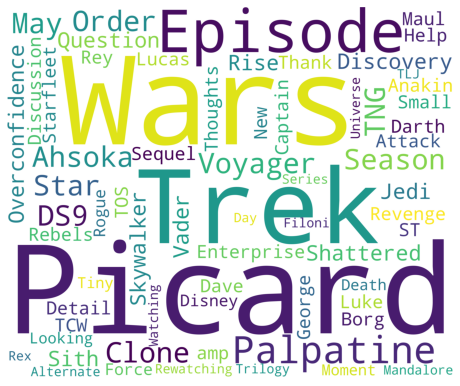

In [52]:
most_common_100 = propernouns_count.most_common(101)
most_common_100 = pd.DataFrame(most_common_100)
most_common_100 = most_common_100.drop(most_common_100.index[1])
most_common_100 = most_common_100.drop(most_common_100.index[38])

most_common_100.rename(columns={0:'text',1:'score'},inplace=True)
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(' '.join(most_common_100['text']))

plt.figure(1,figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

In [53]:
##Wordcloud -top 100 words taking from both the clouds to visualize the words

In [54]:
custom_stop = list(ENGLISH_STOP_WORDS)
cv = CountVectorizer(stop_words = custom_stop, min_df = 6)
X_cv = cv.fit_transform(df_ed['selftext'])
X_cv

<1033x2530 sparse matrix of type '<class 'numpy.int64'>'
	with 61427 stored elements in Compressed Sparse Row format>

In [55]:
custom_stop = list(ENGLISH_STOP_WORDS)
cv = CountVectorizer(stop_words = custom_stop, min_df = 6)
X_cv = cv.fit_transform(df_ed['selftext'])
df_features = pd.DataFrame(data = X_cv.todense(),
                           columns = cv.get_feature_names())
df_features.head()

,01,10,100,11,12,13,14,15,16,17,...,year,years,yellow,yes,yesterday,yoda,young,younger,youtube,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,4,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [56]:
common_words=df_features.sum().sort_values(ascending = False).head(50).index

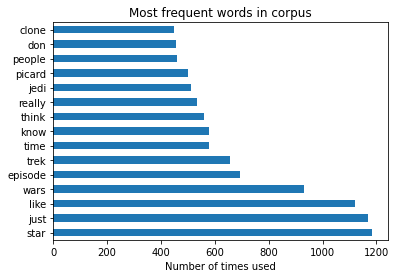

In [57]:
common_words = df_features.sum().sort_values(ascending = False).head(50).index
df_features.sum().sort_values(ascending = False).head(15).plot.barh()
plt.title('Most frequent words in corpus')
plt.xlabel('Number of times used');

In [58]:
##Most frequent words in both the corpus 

In [59]:
df_features=pd.merge(df_features,df_ed['subreddit'],left_index=True,right_index=True)

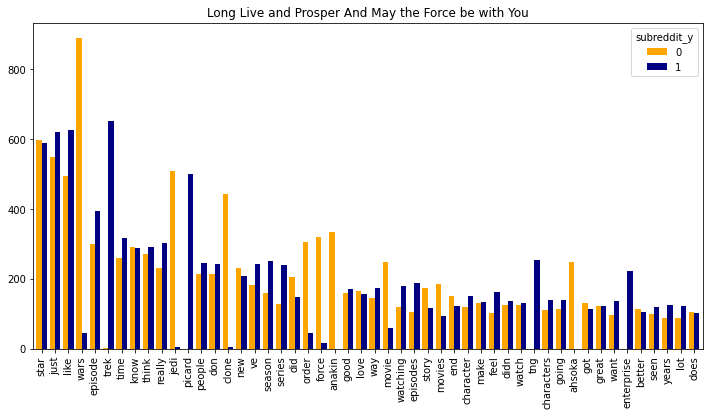

In [60]:
fig, ax = plt.subplots(figsize = (12, 6))
df_features.groupby('subreddit_y').sum()[common_words].T.plot.bar(ax = ax,
                                                               width = 0.8,
                                                               color = ['Orange', 'Navy', 'Black'])
ax.set_title('Long Live and Prosper And May the Force be with You');

In [61]:
##Most frequent words used in both reddits

In [62]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_ed['selftext'], 20)
for word, freq in common_words:
    print(word, freq)
df_ed1 = pd.DataFrame(common_words, columns = ['selftext' , 'count'])
df_ed1.groupby('selftext').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 text in selftext before removing stop words')

the 12405
and 6334
to 5875
of 5060
it 3482
in 3167
that 2989
is 2643
was 2047
but 1793
for 1719
with 1670
this 1629
he 1504
on 1430
they 1411
have 1401
as 1367
be 1323
so 1208


In [63]:
#The distribution of top unigrams before removing stop words

In [64]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_ed['selftext'], 20)
for word, freq in common_words:
    print(word, freq)
df_ed2 = pd.DataFrame(common_words, columns = ['selftext' , 'count'])
df_ed2.groupby('selftext').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 text in selftext after removing stop words')

star 1184
just 1168
like 1120
wars 933
episode 692
trek 655
time 578
know 577
think 560
really 533
jedi 513
picard 501
people 458
don 457
clone 448
new 437
ve 425
season 410
series 368
did 354


In [65]:
##The distribution of top unigrams after removing stop words

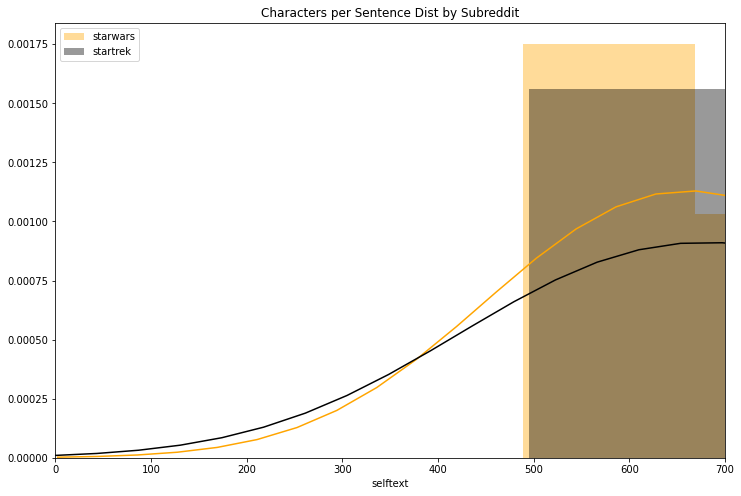

In [66]:
plt.figure(figsize = (12, 8))
plt.xlim(right = 700)
sns.distplot(df_ed.loc[df_ed['subreddit'] == 0, 'selftext'].str.len(), color = 'orange', label = 'starwars');
sns.distplot(df_ed.loc[df_ed['subreddit'] == 1, 'selftext'].str.len(), color = 'k', label = 'startrek');

plt.title('Characters per Sentence Dist by Subreddit')
plt.legend()

In [67]:
#Both the reddits showing more or like same cherecters distribution per sentance.

In [68]:
##Recommendation:
#Multinomial bayers model giving very outstanding performance overall in my models
#More feature options can choose like post comment, Upvotes etc. for more feature engineering can give more performance and can any get more informative analysis.
#Considering the small amount of data gathered and minimal amount of features used, the Multinomial Naive Bayes model was the most outstanding